In [202]:
import pandas as pd
import math
from scipy.stats import zscore

In [203]:
dados = pd.read_csv('Cidades-mp-2.5-novo-meses-imputados.csv',sep=';',encoding = "ISO-8859-1")

In [204]:
dados.head()

,cidade,jan_2017,fev_2017,mar_2017,abr_2017,mai_2017,jun_2017,jul_2017,ago_2017,set_2017,...,mar_2018,abr_2018,mai_2018,jun_2018,jul_2018,ago_2018,set_2018,out_2018,nov_2018,dez_2018
0,Santos-Ponta da Praia,13,18,12,12,14,20,21,18,23,...,14,16,16,18,20,14,13,11,10,14
1,Santana,11,11,15,17,17,19,21,20,29,...,15,17,19,21,29,16,17,13,11,15
2,Parque D.Pedro II,11,14,12,11,16,19,21,22,32,...,15,17,20,24,34,17,18,13,12,17
3,Congonhas,13,17,14,14,17,20,20,21,30,...,18,19,20,27,32,17,18,15,14,16
4,Ibirapuera,10,13,10,10,15,17,19,20,31,...,15,16,18,20,28,12,14,10,10,12


In [205]:


#Apresenta a quantidade de valores nulos por mes
print(dados.isna().sum())



cidade      0
jan_2017    0
fev_2017    0
mar_2017    0
abr_2017    0
mai_2017    0
jun_2017    0
jul_2017    0
ago_2017    0
set_2017    0
out_2017    0
nov_2017    0
dez_2017    0
jan_2018    0
fev_2018    0
mar_2018    0
abr_2018    0
mai_2018    0
jun_2018    0
jul_2018    0
ago_2018    0
set_2018    0
out_2018    0
nov_2018    0
dez_2018    0
dtype: int64


In [206]:
dados_Limpeza=dados

In [207]:

dados_Limpeza.drop("cidade", axis=1, inplace=True)
#dados_Limpeza.apply(zscore)

In [208]:
##Aplicar o algoritmo k-medoid

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

In [211]:
#l = ['0.2644541398559192', '0.27057176121292015', ' 0.15402760752724384', '0.19954588797465597', '0.1622160259962173', '0.17877815775423736']
#max(l, key=float)
maioresValoresSilhuetak_means=[]
somatoriaK_means=0
for j in range(1,100):
    print(j)
    arraySilhueta=[]
    for i in range(2,20):
    
        kmeans = KMeans(n_clusters=i, random_state=1234)
        pred= kmeans.fit_predict(std_data)
        score_sillhoute = silhouette_score (std_data, pred, metric='euclidean')
        #rint('Número de Cluster: ',i,'- valor Coeficiente: ',score_sillhoute)
        arraySilhueta.append(score_sillhoute)
    print(max(arraySilhueta,key=float))
    maioresValoresSilhuetak_means.append(max(arraySilhueta,key=float))
    somatoriaK_means=somatoriaK_means+max(arraySilhueta,key=float)
print(maioresValoresSilhuetak_means)

maiorValorSilhueta=max(maioresValoresSilhuetak_means,key=float)
print("Maior Valor obtido: ",maiorValorSilhueta)

print("Valor Médio: ",(somatoriaK_means/100))

1
0.27057176121292015
2
0.27057176121292015
3
0.27057176121292015
4
0.27057176121292015
5
0.27057176121292015
6
0.27057176121292015
7
0.27057176121292015
8
0.27057176121292015
9
0.27057176121292015
10
0.27057176121292015
11
0.27057176121292015
12
0.27057176121292015
13
0.27057176121292015
14
0.27057176121292015
15
0.27057176121292015
16
0.27057176121292015
17
0.27057176121292015
18
0.27057176121292015
19
0.27057176121292015
20
0.27057176121292015
21
0.27057176121292015
22
0.27057176121292015
23
0.27057176121292015
24
0.27057176121292015
25
0.27057176121292015
26
0.27057176121292015
27
0.27057176121292015
28
0.27057176121292015
29
0.27057176121292015
30
0.27057176121292015
31
0.27057176121292015
32
0.27057176121292015
33
0.27057176121292015
34
0.27057176121292015
35
0.27057176121292015
36
0.27057176121292015
37
0.27057176121292015
38
0.27057176121292015
39
0.27057176121292015
40
0.27057176121292015
41
0.27057176121292015
42
0.27057176121292015
43
0.27057176121292015
44
0.270571761212920

In [178]:
#encontrando o melhor k
silhouette = []
silhouette.append((1,float(0),))
std_data = StandardScaler().fit_transform(dados_Limpeza)
for i in range(2,20):
    
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=1234)
    pred= kmeans.fit_predict(std_data)
    score_sillhoute = silhouette_score (std_data, pred, metric='euclidean')
    print('Número de Cluster: ',i,'- valor Coeficiente: ',score_sillhoute)
    silhouette.append((i,score_sillhoute,))  
    




Número de Cluster:  2 - valor Coeficiente:  0.2644541398559192
Número de Cluster:  3 - valor Coeficiente:  0.27057176121292015
Número de Cluster:  4 - valor Coeficiente:  0.15402760752724384
Número de Cluster:  5 - valor Coeficiente:  0.19954588797465597
Número de Cluster:  6 - valor Coeficiente:  0.14144576762265684
Número de Cluster:  7 - valor Coeficiente:  0.1622160259962173
Número de Cluster:  8 - valor Coeficiente:  0.17877815775423736
Número de Cluster:  9 - valor Coeficiente:  0.13158748992080258
Número de Cluster:  10 - valor Coeficiente:  0.1324713414405244
Número de Cluster:  11 - valor Coeficiente:  0.13719084575217513
Número de Cluster:  12 - valor Coeficiente:  0.11995316631549087
Número de Cluster:  13 - valor Coeficiente:  0.13032179675089925
Número de Cluster:  14 - valor Coeficiente:  0.08025453862487068
Número de Cluster:  15 - valor Coeficiente:  0.08639060013104795
Número de Cluster:  16 - valor Coeficiente:  0.0917528935849506
Número de Cluster:  17 - valor Coefic

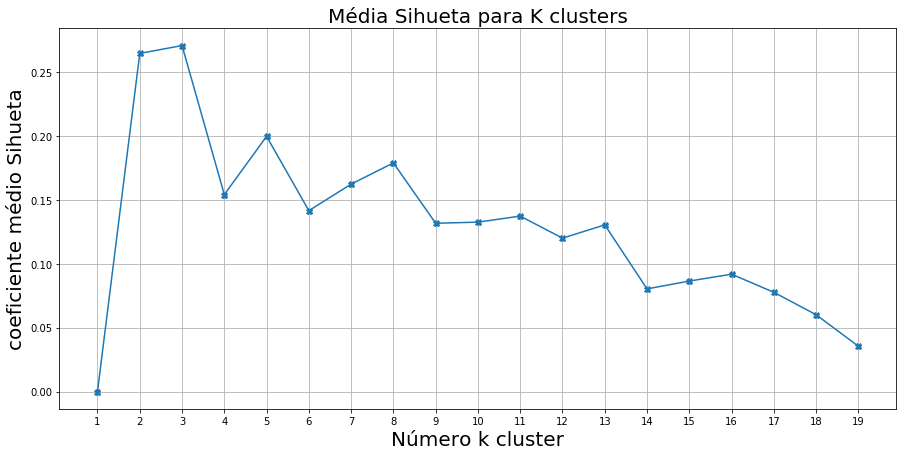

In [182]:
plt.figure(figsize=(15,7))    
plt.grid(True)
plt.title("Média Sihueta para K clusters",fontsize=20)
plt.xlabel("Número k cluster",fontsize=20)
plt.ylabel("coeficiente médio Sihueta",fontsize=20)
plt.plot([str(w[0]) for w in silhouette],[w[1] for w in silhouette], marker="X")

In [45]:
##Pela Vizualização o mrlhor numero de grupo foi 3

In [108]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=1234)
kmeans.fit(std_data)
cluster_list = kmeans.labels_


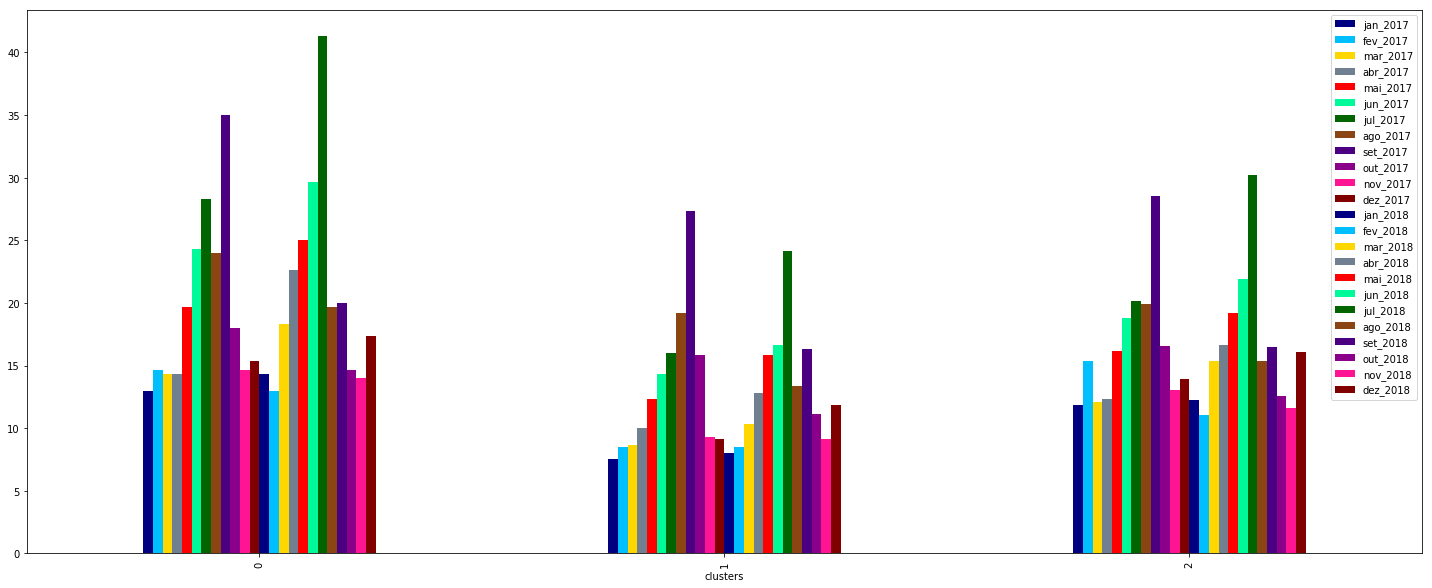

In [109]:

colores=['#000080', '#00BFFF', '#FFD700', '#708090', '#FF0000', '#00FA9A', '#006400', '#8B4513', '#4B0082','#8B008B','#FF1493', '#800000','#000080', '#00BFFF', '#FFD700', '#708090', '#FF0000', '#00FA9A', '#006400', '#8B4513', '#4B0082','#8B008B','#FF1493', '#800000']
dados_Limpeza["clusters"] = cluster_list
dados_Limpeza.groupby("clusters").aggregate("mean").plot(kind = 'bar',color=colores, figsize=(25, 10), fontsize = 10)
## Dataframe Só para a média dessas cidades


In [110]:
mediaPorCluster = DataFrame (dados_Limpeza.groupby("clusters").aggregate("mean"))

mediaPorCluster.head()

,jan_2017,fev_2017,mar_2017,abr_2017,mai_2017,jun_2017,jul_2017,ago_2017,set_2017,out_2017,...,mar_2018,abr_2018,mai_2018,jun_2018,jul_2018,ago_2018,set_2018,out_2018,nov_2018,dez_2018
clusters,,,,,,,,,,,,,,,,,,,,,
0,13.000000,14.666667,14.333333,14.333333,19.666667,24.333333,28.333333,24.000000,35.000000,18.000000,...,18.333333,22.666667,25.000000,29.666667,41.333333,19.666667,20.000000,14.666667,14.000000,17.333333
1,7.500000,8.500000,8.666667,10.000000,12.333333,14.333333,16.000000,19.166667,27.333333,15.833333,...,10.333333,12.833333,15.833333,16.666667,24.166667,13.333333,16.333333,11.166667,9.166667,11.833333
2,11.833333,15.333333,12.083333,12.333333,16.166667,18.833333,20.166667,19.916667,28.500000,16.583333,...,15.333333,16.666667,19.166667,21.916667,30.250000,15.333333,16.500000,12.583333,11.583333,16.083333


C:\Users\Mirellebueno\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


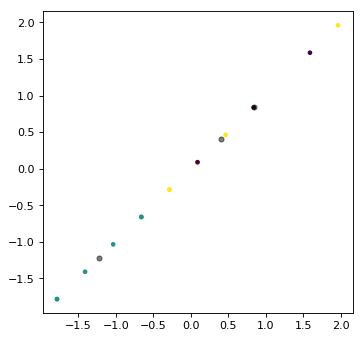

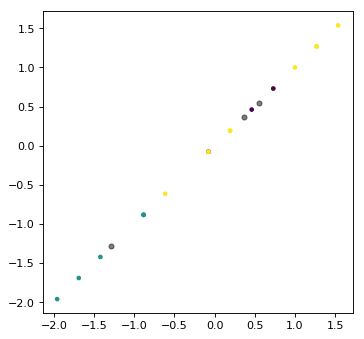

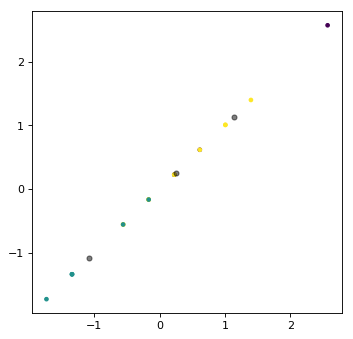

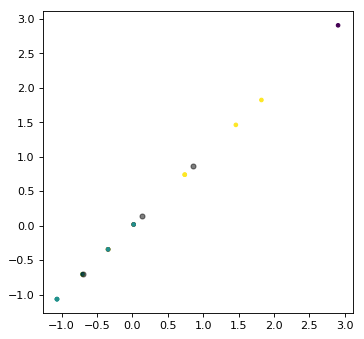

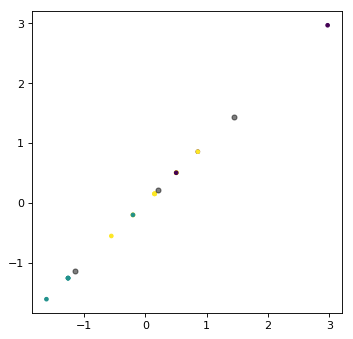

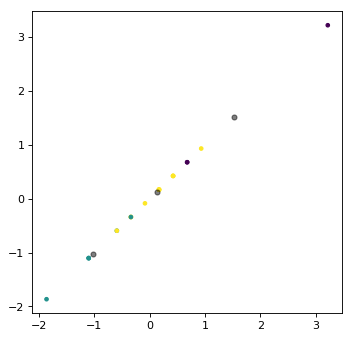

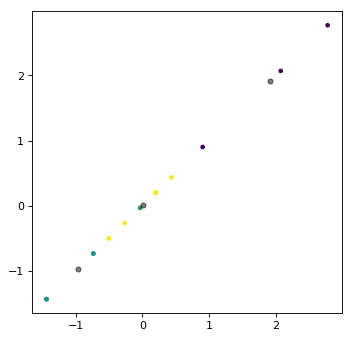

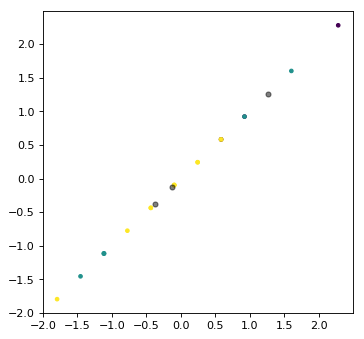

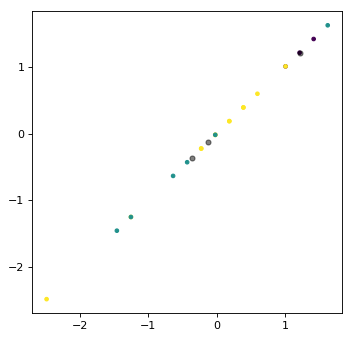

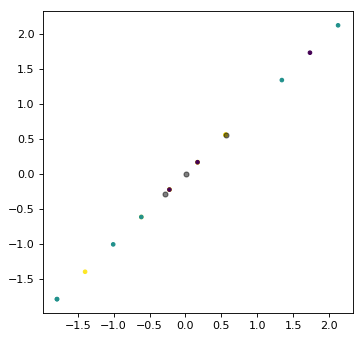

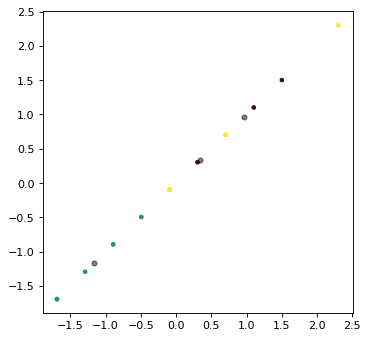

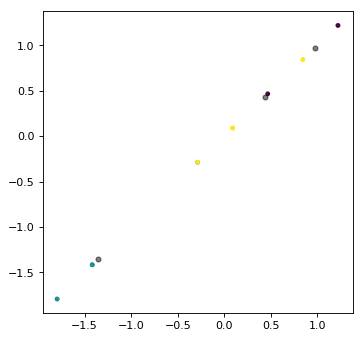

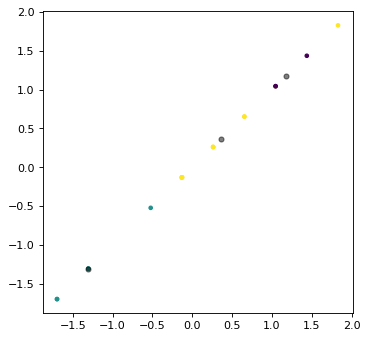

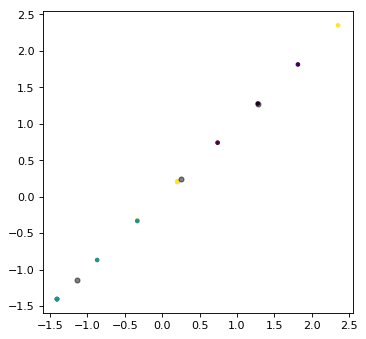

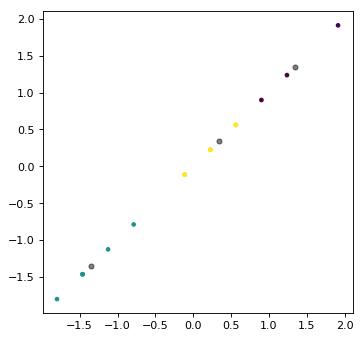

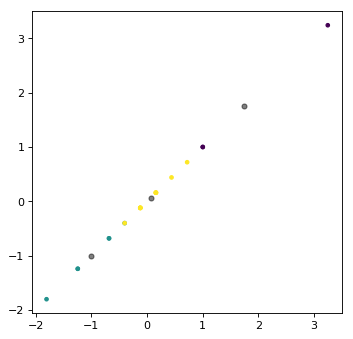

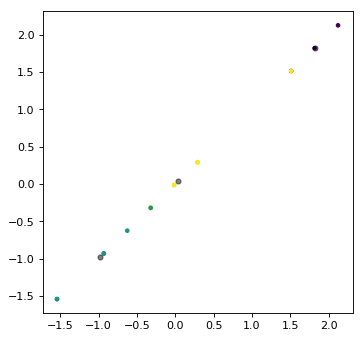

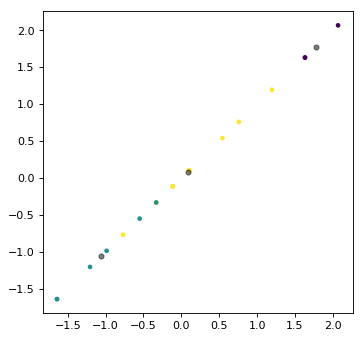

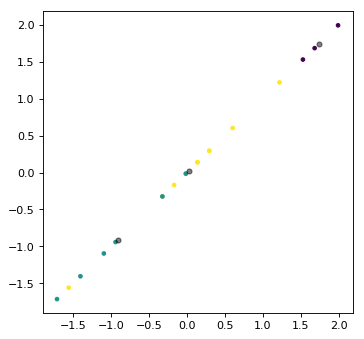

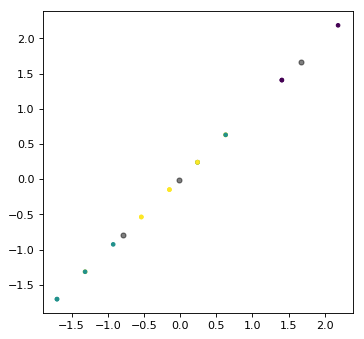

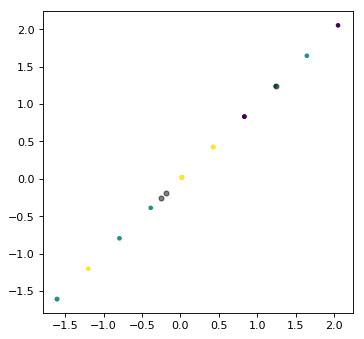

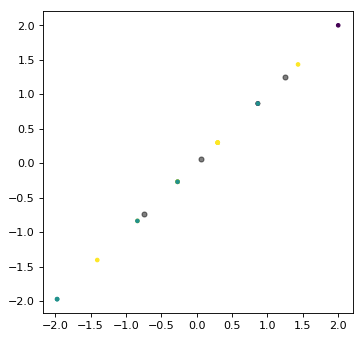

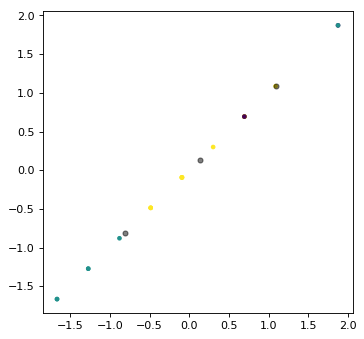

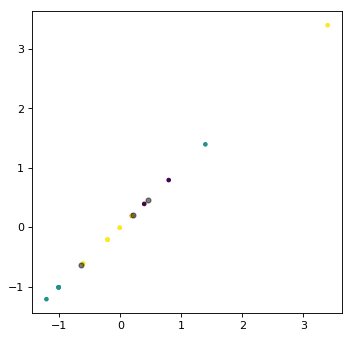

In [111]:
y_kmeans = kmeans.predict(std_data)


for i in range(0,24):
    plt.figure(figsize=(5, 5), dpi=80)
    
    plt.scatter(std_data[:, i], std_data[:, i],c=y_kmeans, s=10, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, i], centers[:, i], c='black', s=20, alpha=0.5);
    


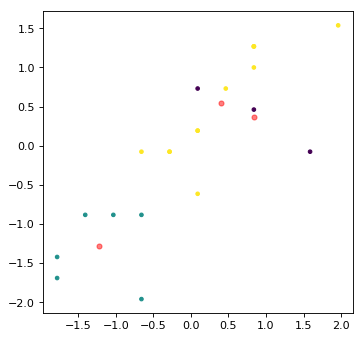

In [113]:

plt.figure(figsize=(5, 5), dpi=80)    
plt.scatter(std_data[:, 0], std_data[:, 1],c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20, alpha=0.5);


In [114]:

# !! Get the indices of the points for each corresponding cluster
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
mydict

{0: array([ 8, 11, 13], dtype=int64),
 1: array([14, 15, 16, 17, 18, 20], dtype=int64),
 2: array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 12, 19], dtype=int64)}

In [115]:
dataset = pd.read_csv('Cidades-mp-2.5-novo.csv',sep=';',encoding = "ISO-8859-1")
for j in mydict:

    nome_arquivo='Grupo-mp-2.5'+str(j)+'.txt'
    print (nome_arquivo)
    arquivo = open(nome_arquivo, "w")
   
    for m in mydict[j]:
        print(dataset.iloc[m][0])
        arquivo.write('\n')
        arquivo.write(dataset.iloc[m][0])
        
    arquivo.close()

Grupo-mp-2.50.txt
Osasco
Marg.Tiete-Pte
Guarulhos-Pimentas
Grupo-mp-2.51.txt
Pico do Jaragua
S.Jose Campos-Jd.
Taubate
Ribeirao Preto
Piracicaba
São Jose do Rio Preto
Grupo-mp-2.52.txt
Santos-Ponta da Praia
Santana
Parque D.Pedro II
Congonhas
Ibirapuera
Cid.Universitária-USP-
Grajau-Parelheiros
Pinheiros
Guarulhos-Paço
Itaim Paulista
S.Bernardo-Centro
Campinas-V.União


# Aplicando os dados de Mp2.5 ao K-medoids

In [212]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.silhouette import silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
import random

dados = pd.read_csv('Cidades-mp-2.5-novo-meses-imputados.csv',sep=';',encoding = "ISO-8859-1")
dados_Limpeza=dados
dados_Limpeza.drop("cidade", axis=1, inplace=True)

std_data = StandardScaler().fit_transform(dados_Limpeza)
silhouette_K_medoids = []



def inicializar_array():
    
    arrayMedois=[0] * 20
    for m in range(0,20):
        medoid=[]
    #print(m)
        for j in range(0,m):
            valorRandom=random.randint(0,20)
        
            while valorRandom in medoid:
                #print(valorRandom)
                valorRandom=random.randint(0,20)
        
            medoid.append(valorRandom)
        arrayMedois[m]=(medoid) 
    return arrayMedois
##Encontrando o melhor valor de K no k-medoids

def tranformando_saida(arrayMedoid_previsao):
    
    arrayClusters_KMedoid=[0] * 21

    for ite_i in range(len(arrayMedoid_previsao)):
        for ite_j in arrayMedoid_previsao[ite_i]:
            arrayClusters_KMedoid[ite_j ]=ite_i;
    return arrayClusters_KMedoid


print(len(std_data))
    

21


In [213]:
arrayMedois

[[],
 [18],
 [0, 7],
 [20, 10, 12],
 [4, 16, 15, 3],
 [19, 6, 15, 4, 10],
 [14, 2, 11, 17, 19, 15],
 [17, 1, 18, 12, 5, 16, 19],
 [7, 10, 5, 9, 3, 19, 1, 11],
 [1, 16, 5, 20, 3, 2, 15, 19, 17],
 [19, 10, 16, 11, 0, 14, 18, 3, 1, 2],
 [12, 2, 9, 17, 3, 11, 15, 18, 7, 19, 4],
 [8, 9, 16, 20, 14, 12, 10, 2, 5, 15, 7, 6],
 [1, 10, 13, 18, 17, 12, 7, 2, 5, 6, 14, 3, 0],
 [16, 15, 5, 2, 7, 9, 17, 12, 1, 3, 19, 20, 18, 13],
 [17, 5, 7, 16, 11, 20, 3, 18, 2, 15, 19, 4, 9, 14, 1],
 [11, 12, 4, 15, 0, 3, 16, 19, 6, 9, 18, 14, 17, 7, 13, 5],
 [14, 5, 19, 2, 15, 6, 12, 4, 0, 11, 9, 1, 10, 18, 7, 8, 17],
 [9, 14, 18, 0, 19, 20, 7, 1, 8, 6, 12, 10, 15, 4, 5, 16, 13, 11],
 [12, 16, 5, 20, 11, 2, 17, 15, 6, 1, 14, 9, 8, 7, 4, 3, 19, 0, 10]]

In [214]:

maioresValoresSilhuetak_means=[]
somatoria=0
for j in range(0,100):
    arraymedoidsK_medoides=inicializar_array()
    print(j)
    arrayk_medoid=[]
    for i in range(2,20):
    
    #print(k_medoid_iteration)
        clusterK = kmedoids(std_data[:, 0:24], arraymedoidsK_medoides[i])
        clusterK.process()
        resultados_medoid=clusterK.get_clusters()
        #print(resultados_medoid)
   
        prevk_medoid=tranformando_saida(resultados_medoid)
        score_sillhoute_k_medoid = silhouette_score (std_data,prevk_medoid , metric='euclidean')
        #print('Número de Cluster: ',i,'- valor Coeficiente: ',score_sillhoute_k_medoid)
        arrayk_medoid.append(score_sillhoute_k_medoid)
    
    maioresValoresSilhuetak_means.append(max(arrayk_medoid,key=float))
    print(max(arrayk_medoid,key=float))
    somatoria=somatoria+max(arrayk_medoid,key=float)
print(somatoria/100)

0
0.3230104251257747
1
0.2940140989778391
2
0.23890487331225307
3
0.2940140989778391
4
0.2940140989778391
5
0.3230104251257747
6
0.2826239156233839
7
0.3230104251257747
8
0.23890487331225307
9
0.1546085022593273
10
0.2826239156233839
11
0.3230104251257747
12
0.3230104251257747
13
0.2826239156233839
14
0.2940140989778391
15
0.3230104251257747
16
0.23890487331225307
17
0.3230104251257747
18
0.3230104251257747
19
0.3230104251257747
20
0.3230104251257747
21
0.3230104251257747
22
0.3230104251257747
23
0.3230104251257747
24
0.3230104251257747
25
0.23890487331225307
26
0.3230104251257747
27
0.3230104251257747
28
0.27057176121292015
29
0.23890487331225307
30
0.3230104251257747
31
0.3230104251257747
32
0.23890487331225307
33
0.2940140989778391
34
0.2669097658508423
35
0.3230104251257747
36
0.3230104251257747
37
0.2940140989778391
38
0.3230104251257747
39
0.3230104251257747
40
0.2826239156233839
41
0.3230104251257747
42
0.23890487331225307
43
0.3230104251257747
44
0.3230104251257747
45
0.2389048

Número de Cluster:  2 - valor Coeficiente:  0.3230104251257747
Número de Cluster:  3 - valor Coeficiente:  0.27057176121292015
Número de Cluster:  4 - valor Coeficiente:  0.1606010758719641
Número de Cluster:  5 - valor Coeficiente:  0.11634487784981157
Número de Cluster:  6 - valor Coeficiente:  0.13376036861171872
Número de Cluster:  7 - valor Coeficiente:  0.06288631871288325
Número de Cluster:  8 - valor Coeficiente:  0.04211321403036647
Número de Cluster:  9 - valor Coeficiente:  -0.003337650105201024
Número de Cluster:  10 - valor Coeficiente:  0.00581227945841785
Número de Cluster:  11 - valor Coeficiente:  0.026481188333138013
Número de Cluster:  12 - valor Coeficiente:  0.04027841865723647
Número de Cluster:  13 - valor Coeficiente:  0.09598482121531948
Número de Cluster:  14 - valor Coeficiente:  -0.02549777986163101
Número de Cluster:  15 - valor Coeficiente:  -0.009730251385940721
Número de Cluster:  16 - valor Coeficiente:  0.012737298815724944
Número de Cluster:  17 - val

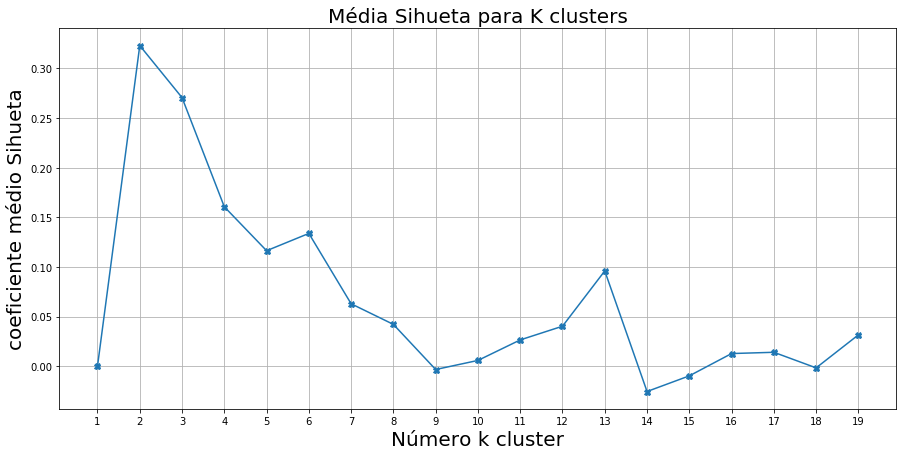

In [215]:
from pyclustering.cluster.clarans import clarans; 
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.silhouette import silhouette_ksearch_type, silhouette_ksearch

k_medoids_index=[[13,18],[5,13,18],[10,5,13,18],[20,10,5,13,18],[7,20,10,5,13,18],[16,7,20,10,5,13,18],[15,16,7,20,10,5,13,18],[2,15,16,7,20,10,5,13,18],[10,2,15,16,7,20,10,5,13,18]]
#k_medoids_index=[[random.randint(0,21),random.randint(0,21)],[random.randint(0,21),random.randint(0,21),random.randint(0,21)],[random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21)],[random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21)],[random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21)],[random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21)],[random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21)],[random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21)],[random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21),random.randint(0,21)]]

k_medoid_iteration=2
silhouetteK_medoids = []
silhouetteK_medoids.append((1,float(0),))
for i in range(2,20):
    
    #print(k_medoid_iteration)
    clusterK = kmedoids(std_data[:, 0:24], arrayMedois[k_medoid_iteration])
    clusterK.process()
    resultados_medoid=clusterK.get_clusters()
    #print(resultados_medoid)
   
    prevk_medoid=tranformando_saida(resultados_medoid)
    score_sillhoute_k_medoid = silhouette_score (std_data,prevk_medoid , metric='euclidean')
    print('Número de Cluster: ',i,'- valor Coeficiente: ',score_sillhoute_k_medoid)
    silhouetteK_medoids.append((i,score_sillhoute_k_medoid,)) 
    k_medoid_iteration=k_medoid_iteration+1
    
plt.figure(figsize=(15,7))    
plt.grid(True)
plt.title("Média Sihueta para K clusters",fontsize=20)
plt.xlabel("Número k cluster",fontsize=20)
plt.ylabel("coeficiente médio Sihueta",fontsize=20)

plt.plot( [str(w[0]) for w in silhouetteK_medoids],[w[1] for w in silhouetteK_medoids], marker="X")

#array_Medois.append(random.randint(0,21))
    #silhouette.append((i,score_sillhoute,))  
#plt.plot([w[0] for w in silhouette],[w[1] for w in silhouette], marker="X")

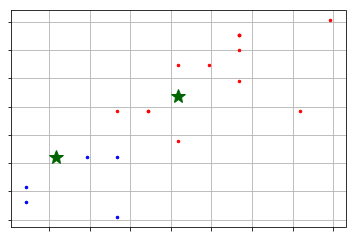

[[2, 0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19], [18, 14, 15, 16, 17, 20]]

In [163]:



cluster = kmedoids(std_data[:, 0:24], [20,18])


cluster.get_medoids()

cluster.process()

previsoes = cluster.get_clusters()


medoides = cluster.get_medoids()



v = cluster_visualizer()

v.append_clusters(previsoes, std_data[:,0:2])

v.append_cluster(medoides, data = std_data[:,0:2], marker = '*', markersize = 15)


v.show()

previsoes


#medoides




0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    1
19    0
20    1
Name: clustersK-medoids, dtype: int64

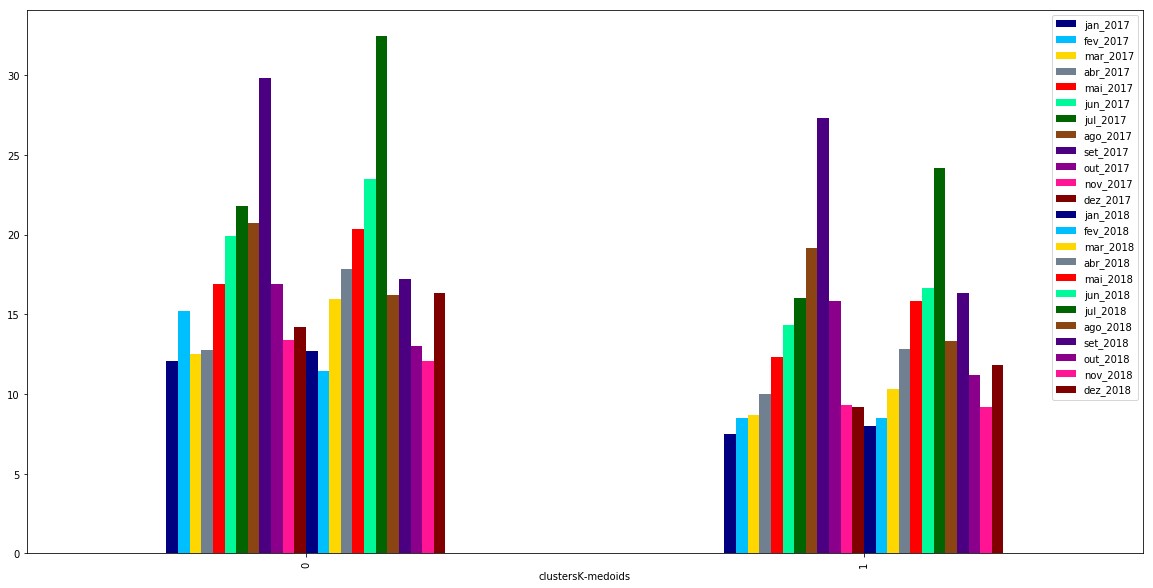

In [165]:
##Criar grafico de barras
arrayClusters=[0] * 21

for i in range(len(previsoes)):
    for j in previsoes[i]:
        arrayClusters[j]=i;
colores=['#000080', '#00BFFF', '#FFD700', '#708090', '#FF0000', '#00FA9A', '#006400', '#8B4513', '#4B0082','#8B008B','#FF1493', '#800000','#000080', '#00BFFF', '#FFD700', '#708090', '#FF0000', '#00FA9A', '#006400', '#8B4513', '#4B0082','#8B008B','#FF1493', '#800000']
#dados_Limpeza.drop("clusters", axis=1, inplace=True)
dados_Limpeza["clustersK-medoids"] = arrayClusters
dados_Limpeza.groupby("clustersK-medoids").aggregate("mean").plot(kind = 'bar',color=colores, figsize=(20, 10), fontsize = 10)
dados_Limpeza["clustersK-medoids"]

In [131]:
mediaPorClusterK_medoid = DataFrame (dados_Limpeza.groupby("clustersK-medoids").aggregate("mean"))


#csvK_medoid = mediaPorClusterK_medoid.to_excel("ConcetracaoMediaPorMesK_medoid.xlsx",index=False)
csvK_medoid = mediaPorClusterK_medoid.to_excel("ConcetracaoMediaPorMesK_medoid.xlsx")
#df1.to_excel("output.xlsx") 
for vizualizeDataFrame in mediaPorClusterK_medoid:
    print(mediaPorClusterK_medoid[vizualizeDataFrame])

clustersK-medoids
0    12.066667
1     7.500000
Name: jan_2017, dtype: float64
clustersK-medoids
0    15.2
1     8.5
Name: fev_2017, dtype: float64
clustersK-medoids
0    12.533333
1     8.666667
Name: mar_2017, dtype: float64
clustersK-medoids
0    12.733333
1    10.000000
Name: abr_2017, dtype: float64
clustersK-medoids
0    16.866667
1    12.333333
Name: mai_2017, dtype: float64
clustersK-medoids
0    19.933333
1    14.333333
Name: jun_2017, dtype: float64
clustersK-medoids
0    21.8
1    16.0
Name: jul_2017, dtype: float64
clustersK-medoids
0    20.733333
1    19.166667
Name: ago_2017, dtype: float64
clustersK-medoids
0    29.800000
1    27.333333
Name: set_2017, dtype: float64
clustersK-medoids
0    16.866667
1    15.833333
Name: out_2017, dtype: float64
clustersK-medoids
0    13.400000
1     9.333333
Name: nov_2017, dtype: float64
clustersK-medoids
0    14.200000
1     9.166667
Name: dez_2017, dtype: float64
clustersK-medoids
0    12.666667
1     8.000000
Name: jan_2018, dtype: f

## Escrevendo em um arquivo os grupos do Mp2.5 

In [125]:
dataset = pd.read_csv('Cidades-mp-2.5-novo-meses-imputados.csv',sep=';',encoding = "ISO-8859-1")
for j in range(len(previsoes)):

    nome_arquivo='K-medoids-Grupo-'+str(j)+'-mp-2.5.txt'
    print (nome_arquivo)
    arquivo = open(nome_arquivo, "w")
   
    for m in previsoes[j]:
        
        arquivo.write('\n')
        arquivo.write(dataset.iloc[m][0])
        
    arquivo.close()

K-medoids-Grupo-0-mp-2.5.txt
K-medoids-Grupo-1-mp-2.5.txt
